In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

### III. Machine Learning Classification
Now that we have a sense of what our data loooks like, we're ready to build our classifier. We'll do this in three steps:

* 1. **Data Cleanup**: We'll take a few extra steps to clean up our data and prepare it for our classifiers
* 2. **Training**: We'll train several machine learning models on our input data
* 3. **Evaluation/Analysis**: We'll look at the results of our classifiers and analyze them

In [3]:
df = pd.read_csv('diabetes_india.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
def prepare_dataset(df):
    """
    Separates the dataset into X and y
    """
    X = df.loc[:, df.columns != 'Outcome']
    y = df.Outcome
    return X, y

In [6]:
X, y= prepare_dataset(df)

## Data Cleanup
No dataset is perfect. When you look at some of our features, you might notice that not everything makes sense. For example, if you look at the minimum of some of these columns, you notice that some patients have a BMI and blood pressure of 0. Does that sound right?

Chances are these are **missing values**: those patients don't really have a BMI of 0, but maybe the researchers didn't collect those patient's BMI and so just put 0 in as a subsitute. There are multiple ways to handle missing values. To keep things simple, we'll simply replace those "0" values with the average of that column, which is a rough estimate of what we might expect that patient to have.

In [7]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
# Not every column has 0 for missing values - for example, 0 pregnancies makes sense
# and the minimum Age is 21
columns_to_fill = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
X[columns_to_fill] = X[columns_to_fill].replace(0, X[columns_to_fill].mean())

/Users/alecchapman/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [12]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


The next step we'll take is **scaling** the data. Each of the columns of our table has very different ranges. Some algorithms expect each variable to be scaled within a normal range. 

**TODO:** Describe more

In [13]:
columns = X.columns

In [14]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(data=X, columns=columns)

/Users/alecchapman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/alecchapman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-1.595946e-16,1.156482e-17,2.868076e-16,-4.394633e-17,6.800116e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.553955e+00,-3.985352e+00,-2.037044e+00,-1.125139e+00,-2.074083e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.210503e-01,-6.817623e-01,-6.306536e-01,-4.177681e-01,-7.205473e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.539182e-01,-2.104440e-02,-3.747004e-01,-4.177681e-01,-6.561083e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.104773e-01,6.396735e-01,5.603676e-01,9.234424e-02,6.038797e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542014e+00,4.108443e+00,7.521430e+00,7.819199e+00,5.042893e+00,5.883565e+00,4.063716e+00


## Training
We're now finally ready to train our models! 

There are many different types of algorithms that can be used for machine learning classification. Each one works a little differently and some work better for a specific problem. To find the bestone, we'll pick a few different algorithms and train each of them, then analyze and compare the results.

We'll also split up our dataset into a *train* and *test* set. Our ultimate goal is to be able to predict whether a set of brand-new patients has diabetes. These new patients have never been seen before by our classifier. This means that we need to measure how well our classifier performs with data that it hasn't seen before. So we'll take 20% of our data and leave those rows out during training, then we'll see how our classifiers perform.

**TODO:** Discuss more why it's important to evaluate on testing data that is separate from our training data. Talk a bit about overfitting, compare to real life, such as memorizing exact answers for a quiz.

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [19]:
# Split up data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 22, test_size = 0.2)

#### Classifiers
We won't go into the details about each classifier, but we'll try out each of these 6 classifiers. Feel free to look them up and see how each performs.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [21]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("RFC", RandomForestClassifier()))
models.append(("SVM",SVC()))

In [22]:
model_scores = []
model_names_scores = []
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    pred = model.predict(X_test)
    # Measure the accuracy
    accuracy  = accuracy_score(y_test, pred)
    
    # Append to this list to analyze later
    model_names_scores.append((name, accuracy))

/Users/alecchapman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alecchapman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/alecchapman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Evaluation and Analysis
Let's see how our classifiers did on our test set. Let's start by sorting the scores by accuracy and plotting their performance.

In [23]:
sorted_name_scores = sorted(model_names_scores, key=lambda x:x[1], reverse=True)
sorted_names, sorted_scores = zip(*sorted_name_scores)

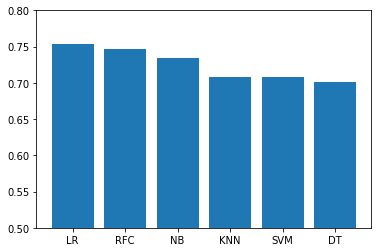

In [25]:
x_plot = range(len(sorted_names))
fig, ax = plt.subplots()

ax.bar(x_plot, sorted_scores)
ax.set_ylim(0.5, 0.8)

ax.set_xticks(x_plot)
_ = ax.set_xticklabels(sorted_names)

The highest performing model is a Logistic Regression classifier (this may change when you run it). Let's choose this as our best classifier and look at more details of the performance.

In [26]:
# Look at the best score
best_clf = LogisticRegression()
best_clf.fit(X_train, y_train)
pred = best_clf.predict(X_test)

/Users/alecchapman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       100
           1       0.75      0.44      0.56        54

   micro avg       0.75      0.75      0.75       154
   macro avg       0.75      0.68      0.69       154
weighted avg       0.75      0.75      0.73       154



Let's now plot a **confusion matrix** to see what kinds of mistakes our classifier is making. A confusion matrix plots the **truth** on the y axis (whether a patient had diabetes or didn't) against the **predictions** on the x axis (whether or not our classifier predicted diabetes).

**DISCUSSION**: What does the confusion matrix below tell us? What is our classifier doing a good job at doing? What does it not do as well at?

ie., it rarely predicts diabetes when a patient doesn't have diabetes, but it often predicts "no diabetes" when the patient has diabetes

In [28]:
conf = confusion_matrix(y_test,pred)

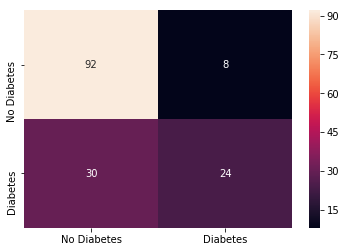

In [29]:
label = ["No Diabetes","Diabetes"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)

# Next Steps
This was a quick overview of the machine learning process. Here are some additional steps you could take to improve your classifier:
- **Model tuning**: We tested a few different classifiers, but we could make a lot of changes to each classifier. Machine learning models have *hyperparameters* which are values that can be tweaked to optimize the performance of the classifier
- **Additional data transformations**: We replaced missing values and scaled the data. We could do additional work to clean up and transform the data
- **Try a larger dataset**: This dataset has only 784 patients. Machine learning benefits from having **lots of data** so that it can see lots of examples of patients to learn patterns from. This is a relatively small dataset. If there are larger, similar datasets that fit our needs, you may want to try and see if using a larger training set improves your performance
- **Cross-Validate**: We split our data into a *training set* and a *testing set*. What was the reason for this? What are some disadvantages of doing this? Cross-validation is another way of splitting up our data in a way that lets you train and test on every patient rather than leaving 20% out of the training process.


# Discussion
**TODO**